# Introduction to neural Networks with Tensorflow and Keras

# Classification with Keras

In [86]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

DIR_PATH = os.path.dirname(os.path.realpath('__file__'))
 
import tensorflow as tf

from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full),(X_test,y_test) = fashion_mnist.load_data()


# Preparing the data set

In [ ]:
X_train_full.shape

In [8]:
X_train_full.dtype

dtype('uint8')

In [4]:
X_valid,X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0

In [5]:
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

# Creating Model using Sequential API Keras

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.layers
hidden1 = model.layers[1]
hidden1.name

weights , biases = hidden1.get_weights()
weights.shape

(784, 300)

In [18]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [19]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 96us/sample - loss: 0.7246 - accuracy: 0.7611 - val_loss: 0.5050 - val_accuracy: 0.8300
Epoch 2/30
55000/55000 [==============================] - 5s 88us/sample - loss: 0.4880 - accuracy: 0.8309 - val_loss: 0.4771 - val_accuracy: 0.8376
Epoch 3/30
55000/55000 [==============================] - 5s 89us/sample - loss: 0.4428 - accuracy: 0.8454 - val_loss: 0.4280 - val_accuracy: 0.8544
Epoch 4/30
55000/55000 [==============================] - 5s 89us/sample - loss: 0.4150 - accuracy: 0.8534 - val_loss: 0.4250 - val_accuracy: 0.8458
Epoch 5/30
55000/55000 [==============================] - 5s 91us/sample - loss: 0.3945 - accuracy: 0.8615 - val_loss: 0.3852 - val_accuracy: 0.8686
Epoch 6/30
55000/55000 [==============================] - 5s 92us/sample - loss: 0.3794 - accuracy: 0.8665 - val_loss: 0.3932 - val_accuracy: 0.8628
Epoch 7/30
55000/55000 [==============================] -

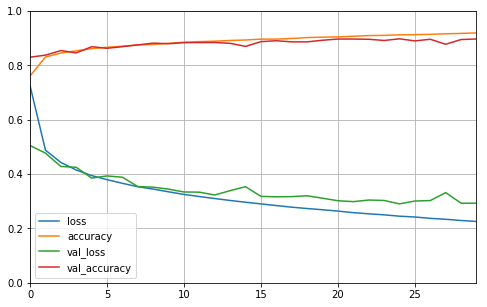

In [27]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [30]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# Regression with Keras

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
housing = fetch_california_housing()

X_train_full , X_test ,y_train_full , y_test = train_test_split(
        housing.data,housing.target)

X_train, X_valid , y_train , y_valid = train_test_split(X_train_full,y_train_full)

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.transform(X_test)

In [63]:
model = keras.models.Sequential([keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),keras.layers.Dense(1)])

model.compile(loss="mean_squared_error",optimizer="sgd")

history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

#mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 82us/sample - loss: 0.8011 - val_loss: 0.5123
Epoch 2/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4469 - val_loss: 0.4683
Epoch 3/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4145 - val_loss: 0.4522
Epoch 4/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4065 - val_loss: 0.4387
Epoch 5/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3962 - val_loss: 0.4435
Epoch 6/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.3897 - val_loss: 0.4543
Epoch 7/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3835 - val_loss: 0.4460
Epoch 8/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.4047 - val_loss: 0.4473
Epoch 9/20
11610/11610 [==============================] - 1s 49us/sample - loss: 0.3873 - val_l

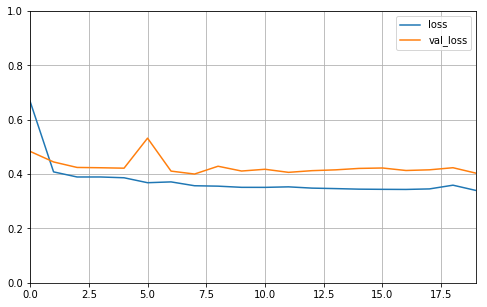

In [38]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Creating Modles using Functional API of Keras  (*wide and deep neural network*)

In [40]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input_] , outputs=[output])


model.compile(loss="mean_squared_error",optimizer="sgd")

history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))


Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 75us/sample - loss: 0.6123 - val_loss: 0.4759
Epoch 2/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.4848 - val_loss: 0.4531
Epoch 3/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3788 - val_loss: 0.4859
Epoch 4/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.3670 - val_loss: 0.4133
Epoch 5/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3545 - val_loss: 0.4450
Epoch 6/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.3484 - val_loss: 0.4609
Epoch 7/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.3450 - val_loss: 0.4133
Epoch 8/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3502 - val_loss: 0.4134
Epoch 9/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3376 - val_l

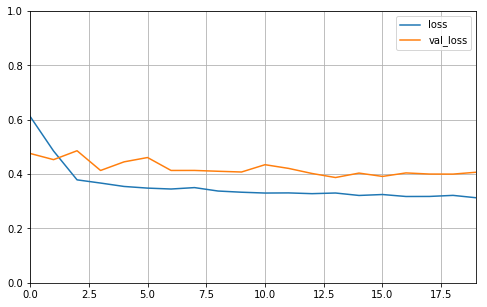

In [41]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [64]:
input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name="deep_input")
hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name="output")(concat)
model = keras.Model(inputs=[input_A,input_B],outputs=[output])
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))



In [66]:
X_train_A , X_train_B = X_train[:,:5],X_train[:,2:]
X_test_A , X_test_B = X_test[:,:5],X_test[:,2:]
X_valid_A , X_valid_B = X_valid[:,:5],X_valid[:,2:]
X_new_A , X_new_B = X_test_A[:3],X_test_B[:3]

In [91]:
history = model.fit((X_train_A,X_train_B),y_train,epochs=20,validation_data=((X_valid_A,X_valid_B),y_valid))


Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 49us/sample - loss: 0.3397 - val_loss: 0.4171
Epoch 2/20
11610/11610 [==============================] - 1s 49us/sample - loss: 0.3395 - val_loss: 0.4200
Epoch 3/20
11610/11610 [==============================] - 1s 49us/sample - loss: 0.3392 - val_loss: 0.4167
Epoch 4/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.3389 - val_loss: 0.4088
Epoch 5/20
11610/11610 [==============================] - 1s 49us/sample - loss: 0.3387 - val_loss: 0.4206
Epoch 6/20
11610/11610 [==============================] - 1s 50us/sample - loss: 0.3381 - val_loss: 0.4123
Epoch 7/20
11610/11610 [==============================] - 1s 49us/sample - loss: 0.3379 - val_loss: 0.4177
Epoch 8/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.3377 - val_loss: 0.4213
Epoch 9/20
11610/11610 [==============================] - 1s 49us/sample - loss: 0.3373 - val_l

In [72]:
#mse_test = model.evaluate((X_test_A,X_test_B),y_test)
y_pred = model.predict((X_new_A,X_new_B))

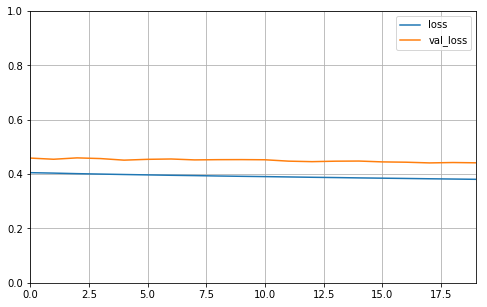

In [75]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Using the Subclassing API to Build Dynamic Models

In [ ]:
class WideandDeepModel(keras,Model):
    def __init__(self,units=30,activation="relu",**kwargs):
        super().__init__(**kwargs) # handles standard args (eg;,name)
        self.hidden1 = keras.layers.Dense(units,activation=activation)
        self.hidden2 = keras.layers.Dense(units,activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self,inputs):
        input_A , input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.concatenate([input_A,hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
    
#model = WideandDeepModel()



# Saving Models and Using Callbacks

In [97]:
#model_path = os.path.join(DIR_PATH,"my_keras_model.h5")
model.save("my_keras_model.h5")

TypeError: 'str' object is not callable

In [90]:
model = keras.models.load_model(os.path.join(DIR_PATH,"my_keras_model.h5"))

OSError: SavedModel file does not exist at: /Users/deepanshu.kandpal/Documents/MYJIOPROJECTS/HELLOJIOML/POC MACHINE LEARNINGS/hands-on-machine-learning/JUPYTER NOTEBOOKS/my_keras_model.h5/{saved_model.pbtxt|saved_model.pb}